In [1]:
###  setting up the env.

In [2]:
!pip install theano

In [3]:
import numpy
import theano

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\vidya\anaconda3\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [4]:
!pip install keras

In [5]:
print(theano.__version__)

1.0.5


In [6]:
import tensorflow
import keras
print(keras.__version__)

2.4.3


In [7]:
print(tensorflow.__version__)

2.3.1


In [8]:

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

In [9]:
### image dataset MNIST

In [10]:
from keras.datasets import mnist

from matplotlib import pyplot as plt

In [47]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [48]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [13]:
### check the dimensions of the image

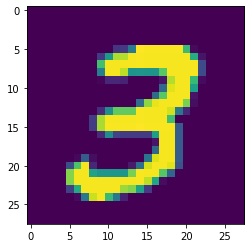

In [49]:
plt.imshow(x_train[7])


In [15]:
### adiing RGB depth to the image

In [16]:
x_train=x_train.reshape(x_train.shape[0],1,28,28)

In [71]:
######reshaping in NHWC format
x_train=x_train.reshape(x_train.shape[0],28,28,1)

In [17]:
x_test=x_test.reshape(x_test.shape[0],1,28,28)

In [73]:
x_test=x_test.reshape(x_test.shape[0],28,28,1)

In [72]:
print(x_train.shape)

(60000, 28, 28, 1)


In [52]:

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [54]:
y_train[:8]

array([5, 0, 4, 1, 9, 2, 1, 3], dtype=uint8)

In [21]:
#np.utils.to_categorical is used to convert array of labeled data(from 0 to nb_classes-1) to one-hot vector.

In [55]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [56]:
y_train[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [24]:
# defining the model architecture

In [25]:
from tensorflow.keras.models import Sequential

keras.layers.Conv2D(filters, kernel_size, strides=(1, 1),
  padding='valid', data_format=None, dilation_rate=(1, 1),
  activation=None, use_bias=True, kernel_initializer='glorot_uniform',
  bias_initializer='zeros', kernel_regularizer=None,
  bias_regularizer=None, activity_regularizer=None,
  kernel_constraint=None, bias_constraint=None)

In [74]:
model=Sequential()
model.add(Convolution2D(32,3,3,activation='relu',input_shape=(28,28,1),data_format = 'channels_last'))

In [75]:
print(model.output_shape)

(None, 9, 9, 32)


In [76]:
model.add(Convolution2D(32, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

In [77]:
model.add(Flatten())
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [78]:
model.compile(loss='categorical_crossentropy',
              optimizer='adagrad',
              metrics=['accuracy'])

In [79]:
model.fit(x_train, y_train, batch_size=32, epochs=100, verbose=1)


Epoch 1/100
1875/1875 [==============================] - 2s 1ms/step - loss: 2.2697 - accuracy: 0.2106
Epoch 2/100
1875/1875 [==============================] - 2s 1ms/step - loss: 2.0554 - accuracy: 0.4060
Epoch 3/100
1875/1875 [==============================] - 2s 1ms/step - loss: 1.6228 - accuracy: 0.4935
Epoch 4/100
1875/1875 [==============================] - 2s 1ms/step - loss: 1.3922 - accuracy: 0.5468
Epoch 5/100
1875/1875 [==============================] - 3s 1ms/step - loss: 1.2830 - accuracy: 0.5818
Epoch 6/100
1875/1875 [==============================] - 2s 1ms/step - loss: 1.2076 - accuracy: 0.6066
Epoch 7/100
1875/1875 [==============================] - 2s 1ms/step - loss: 1.1556 - accuracy: 0.6239
Epoch 8/100
1875/1875 [==============================] - 2s 1ms/step - loss: 1.1185 - accuracy: 0.6387
Epoch 9/100
1875/1875 [==============================] - 2s 1ms/step - loss: 1.0832 - accuracy: 0.6493
Epoch 10/100
1875/1875 [==============================] - 2s 1ms/step - l

1875/1875 [==============================] - 2s 1ms/step - loss: 0.6972 - accuracy: 0.7868
Epoch 80/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6954 - accuracy: 0.7852
Epoch 81/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6926 - accuracy: 0.7887
Epoch 82/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6911 - accuracy: 0.7880
Epoch 83/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6927 - accuracy: 0.7883
Epoch 84/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6908 - accuracy: 0.7873
Epoch 85/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6871 - accuracy: 0.7900
Epoch 86/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6862 - accuracy: 0.7912
Epoch 87/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6851 - accuracy: 0.7908
Epoch 88/100
1875/1875 [==============================] - 2s 1ms/step - loss:

In [84]:

score = model.evaluate(x_test, y_test, verbose=1)

313/313 [==============================] - 0s 734us/step - loss: 0.4813 - accuracy: 0.8625


In [85]:
score

[0.48128223419189453, 0.862500011920929]